In [13]:
%matplotlib inline
from collections import defaultdict

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
data  = pd.read_csv('yelp_restaurant_train.csv')

In [15]:
data.head(5)

,business_id,date,review_id,text,user_id,attributes,name,city,categories,avg_business_stars,avg_user_star,stars
0,HMSDOjt_KCyknzjQ9aI5Jw,2018-11-04 23:44:27,0HWPTEnVT7L5BCKj33erLQ,"I would like to start with the classic line ""I...",iGtInQDTZ89mKnkhFWdlfA,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...",Tomo Noodles and Dumplings,Las Vegas,"Noodles, Restaurants, Japanese, Ramen",4.0,3.04,1.0
1,yXiDD18UV49-7UhA6dWjAw,2018-09-07 20:41:42,Y6xCQlzc9YTXD3IKMGN-oQ,We come here for once at least once a month. I...,O3cItff0mKAfXtl5VmbW2w,"{'GoodForMeal': ""{'dessert': False, 'latenight...",Giacomo's Pizzeria and Italian Restaurant,Charlotte,"Sandwiches, Pizza, Italian, Restaurants, Event...",4.0,4.15,4.0
2,VSNUFYBQ_wOFmRXZ8SeQ4w,2015-09-30 02:07:55,9j_uLXkEgpN52Lz5VJ8sMQ,First meal in Pittsburgh was courtesy of S&D! ...,U5YQX_vMl_xQy8EQDqlNQQ,"{'Alcohol': ""u'none'"", 'DogsAllowed': 'False',...",S&D Polish Deli,Pittsburgh,"Polish, Ethnic Food, Specialty Food, Food, Res...",4.5,3.48,4.0
3,lVVJMvqu4LXL5rBqjO6eqg,2015-05-30 07:40:17,xilO0UqpI_EYJg0nzTBqzw,The Pork bone soup is delicious! The broth loo...,JrgMipJRhagq42ROTzC_CQ,"{'HasTV': 'False', 'WiFi': ""u'no'"", 'BusinessP...",Tofu Village - House of Soon Tofu,Toronto,"Restaurants, Korean",4.5,2.53,4.0
4,EEIz44ewHhOKmfTloAK13g,2017-11-19 16:47:26,P5LDWTH6cxQK-_IWtvyOWw,Words cannot express how delectably divine a d...,8lofUN7rFkwT2bw4b5SM4g,"{'RestaurantsPriceRange2': '4', 'RestaurantsTa...",Alo Restaurant,Toronto,"Bars, Nightlife, Restaurants, French",4.5,3.97,5.0


Visualizing the sparsity training data set by plotting two histograms of the review count grouped by the user_id and business_id respectively

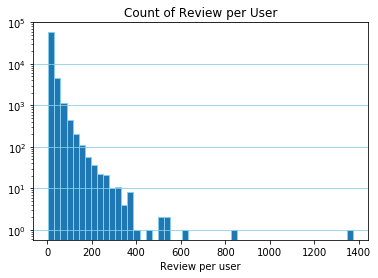

In [16]:
userReviewCount = data.groupby('user_id').review_id.count()
ax = userReviewCount.hist(bins=50,log=True,edgecolor='skyblue')
plt.xlabel("Review per user")
plt.grid(False)
plt.grid(axis = 'y', color ='skyblue', linestyle='-')
plt.title("Count of Review per User");

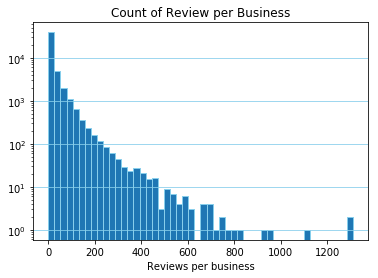

In [17]:
businessReviewCount = data.groupby('business_id').review_id.count()
ax = businessReviewCount.hist(bins=50,log=True,edgecolor='skyblue')
plt.xlabel("Reviews per business")
plt.grid(False)
plt.grid(axis = 'y', color ='skyblue', linestyle='-')
plt.title("Count of Review per Business");

In [18]:
print ("Number of Reviews",data.shape[0])
print ("Number of Users", data.user_id.unique().shape[0])
print("Number of Businesses", data.business_id.unique().shape[0])

Number of Reviews 1078332
Number of Users 64658
Number of Businesses 49160


In [19]:
print('Mean is', round(data.stars.mean(),2))

Mean is 3.77


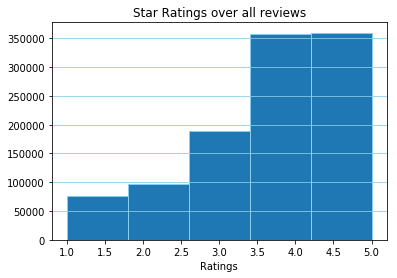

In [20]:
rating = data.stars
r_hist = rating.hist(bins=5,edgecolor='skyblue')
plt.xlabel("Ratings")
plt.grid(False)
plt.grid(axis = 'y', color ='skyblue', linestyle='-')
plt.title("Star Ratings over all reviews");

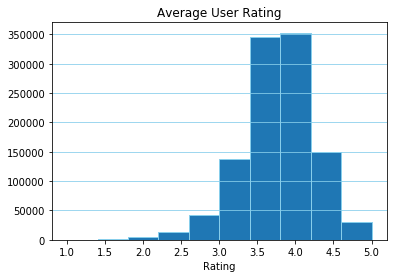

In [21]:
avgUserRating = data.avg_user_star.hist(edgecolor='skyblue')
plt.grid(False)
plt.grid(axis = 'y', color ='skyblue', linestyle='-')
plt.xlabel('Rating')
plt.title('Average User Rating')
plt.show()

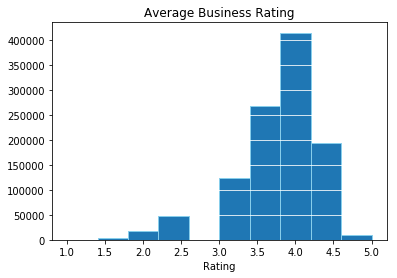

In [22]:
avgBusinessRating = data.avg_business_stars.hist(edgecolor='skyblue')
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.xlabel('Rating')
plt.title('Average Business Rating')
plt.show()

In [29]:
def topNumberOfReviewsForCity(df,m):
    businessCityCount = {}
    n = len(df)
    for i in range(n):
        k1 = str(df.categories.iloc[i]).split(',')
        k2 = df.city.iloc[i]
        for j in k1:
            k = (j,k2)
            if k not in businessCityCount.keys():
                businessCityCount[k] = 1
            else:
                businessCityCount[k] += 1
    businessCityCountSeries = pd.Series(businessCityCount)
    businessCityCountSeries.sort_values(ascending = False, inplace = True)
    return businessCityCountSeries

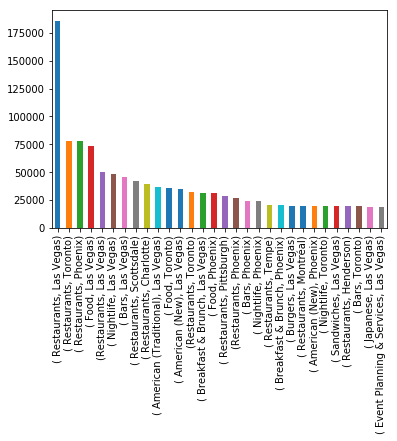

In [30]:
reviewBusinessCity = topNumberOfReviewsForCity(data,10)
reviewBusinessCity[:30].plot(kind = 'bar')